

## Dataset Overview

### **Dataset Name:** Telco Customer Churn

### **Description:**  
The dataset contains customer data from a telecommunications company and is used to predict customer churn. Churn refers to customers who stopped using the company's service within the last month. Each row represents a customer, and the dataset includes information about customer demographics, account information, and the services they have signed up for.



In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
df = pd.read_csv('/content/drive/MyDrive/Tuwaiq/week 4/Practice /Telco_Customer_Churn.csv')

# Exploratory Data Analysis (EDA)



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [40]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
count = df['gender'].value_counts()
count

,count
gender,
Male,3555
Female,3488


### change data type

In [37]:
empty_rows = df[df['TotalCharges'] == ' ']

df = df.drop(empty_rows.index, axis=0)

In [38]:
# df['TotalCharges'] = df['TotalCharges'].replace(' ', '0', regex=True)

df['TotalCharges'] = df['TotalCharges'].astype(float)

### categorical distribution

In [20]:
df_cat = df.select_dtypes(include='object').columns


for col in df_cat:
  count = df[col].value_counts()
  fig = px.bar(count, x=count.index, y='count', title=f'Distribution of {col}', color_discrete_sequence=['#DD5050'])

  fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=count.index,
        ticktext=count.index
     )
  )
  fig.show()

### correlation

<Axes: >

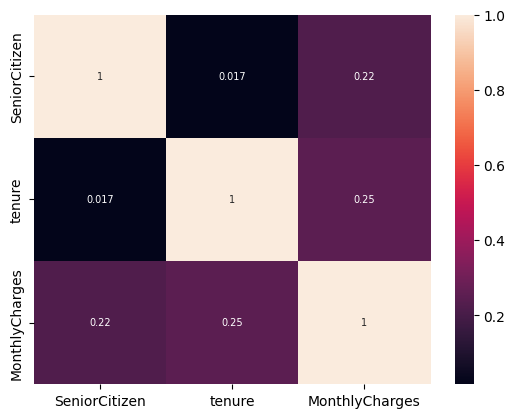

In [21]:
sns.heatmap(df.drop('customerID', axis=1).corr(numeric_only=True), annot=True, annot_kws={'fontsize': 7})


### outlier

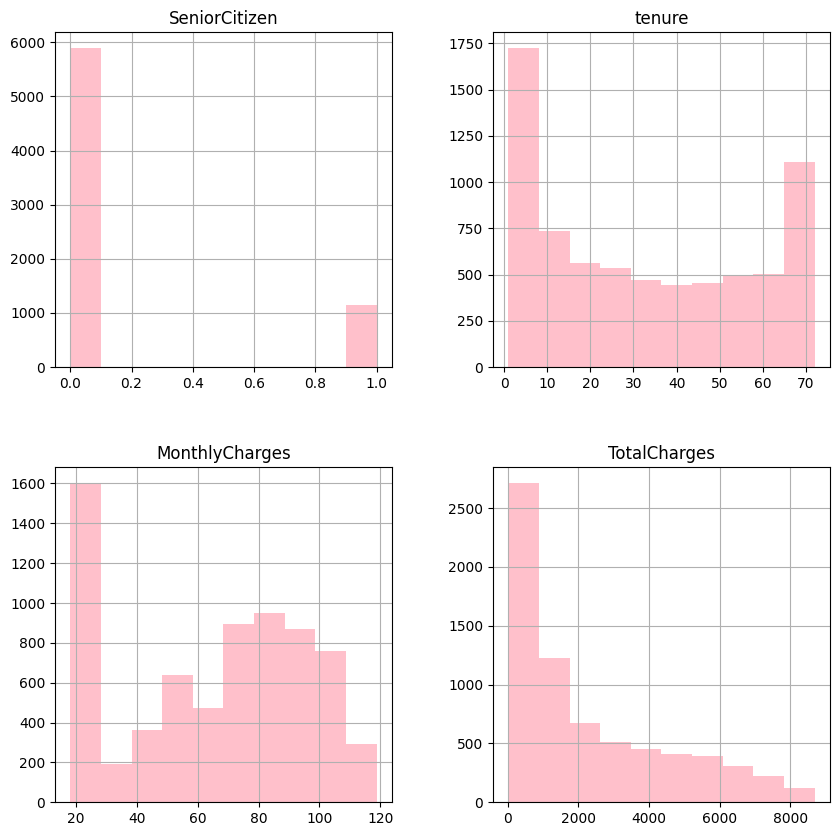

In [39]:
df.hist(figsize=(10, 10), color='pink');

In [41]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.2 * IQR
    upper_bound = Q3 + 1.2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


df = remove_outliers(df, 'TotalCharges')
df = remove_outliers(df, 'MonthlyCharges')

# Feature selection

In [44]:
df.drop(['customerID', 'PaymentMethod'], axis=1 , inplace=True)

# Split Dataset

In [61]:
X = df.drop("Churn", axis=1)
y = df["Churn"].map({'Yes': 1, 'No': 0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Encoding - Scalling

In [62]:
num_pip = make_pipeline(StandardScaler())
cat_pip_one_hot = make_pipeline(OneHotEncoder(handle_unknown='ignore'))


pre_pip = ColumnTransformer([
    ('num_scalling', num_pip, ['tenure','MonthlyCharges', 'TotalCharges' ]),
    ('cat_one_hot', cat_pip_one_hot, ['gender',  'Partner' , 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup', 'TechSupport', 'PaperlessBilling','StreamingMovies',
                                      'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'StreamingTV', 'Contract']),
    ])

X_train = pre_pip.fit_transform(X_train)
X_test = pre_pip.transform(X_test)

# Impalance data

In [59]:
count = df['Churn'].value_counts()

fig = px.bar(count, x=count.index, y='count', title='Distribution of Churn', color_discrete_sequence=['#DD5050'])

fig.update_layout(
    xaxis=dict(
        tickmode='array',
        tickvals=count.index,
        ticktext=count.index
    )
)
fig.show()

In [63]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Building the ANN Model


In [74]:
model = Sequential([
    Dense(16, input_shape=(X_train.shape[1],), activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 16)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,865 (50.25 KB)

 Trainable params: 12,865 (50.25 KB)

 Non-trainable params: 0 (0.00 B)

## Training the Model


In [75]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=10, epochs=20, verbose=1)

Epoch 1/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6947 - loss: 0.5616 - val_accuracy: 0.7386 - val_loss: 0.4704
Epoch 2/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7753 - loss: 0.4855 - val_accuracy: 0.7357 - val_loss: 0.4810
Epoch 3/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7636 - loss: 0.4834 - val_accuracy: 0.6874 - val_loss: 0.5061
Epoch 4/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7787 - loss: 0.4712 - val_accuracy: 0.7069 - val_loss: 0.5227
Epoch 5/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7853 - loss: 0.4550 - val_accuracy: 0.7018 - val_loss: 0.5170
Epoch 6/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7892 - loss: 0.4592 - val_accuracy: 0.7379 - val_loss: 0.4978
Epoch 7/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7846 - loss: 0.4619 - val_accuracy: 0.7213 - val_loss: 0.4924
Epoch 8/20
808/808 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7914 - loss: 0.4444 - val_accuracy: 0.

## Evaluate the Model


In [76]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7427 - loss: 0.4876


[0.5363942980766296, 0.7169675230979919]

In [77]:
model.evaluate(X_train, y_train)

253/253 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7771 - loss: 0.4427


[0.4094189405441284, 0.8187562227249146]

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

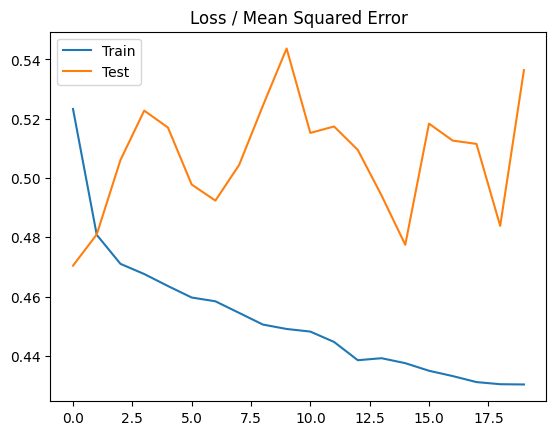

In [81]:
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='Train', color='')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.show()



## Save the Model


In [ ]:
model.save('my_model.h5')